<a href="https://colab.research.google.com/github/CarolinaGarza22/LauraCarolinaGarzaLozano/blob/main/Garza_Laura_de_FBAct_1_Programacion_simbolica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [2]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = K_o/K_i
dKio

4.166666666666667

Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

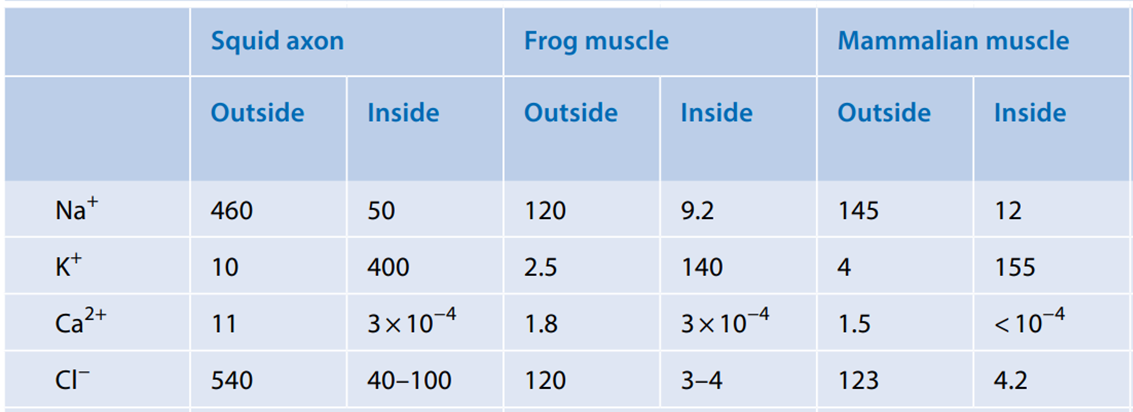

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [3]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [4]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

In [5]:
x = Symbol('x')
x

x

In [6]:
y = Symbol('y')
y

y

In [7]:
z = x**2+y**3+3*x*y+2*y-3*x

In [8]:
z

x**2 + 3*x*y - 3*x + y**3 + 2*y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [9]:
z = 3*x+y
z

3*x + y

In [10]:
z.subs({x:3,y:1})

10

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [27]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

Definicion de variables para calcular el potencial de Nernst del K

In [28]:
KIn = Symbol('c_i,K')
KOut = Symbol('c_o,K')
K_Z = Symbol('z_K')

Definicion de la funcion del potencial de Nernst del K

In [29]:
V_K = -((R*T)/(K_Z*F))*(log(KIn/KOut))
V_K

-R*T*log(c_i,K/c_o,K)/(F*z_K)

Resultado esperado.


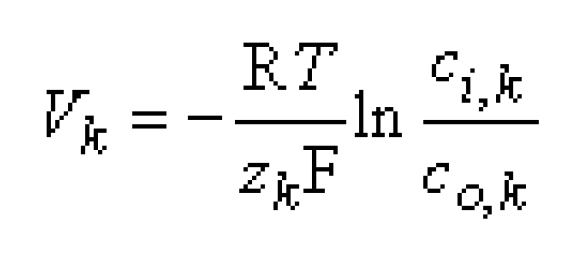

Asignacion de valores numericos a las variables de concentracion de K

In [32]:
Valor_v_k=V_K.subs({R:8.315,T:300,K_Z:1,F:9.648*(10**4),KIn:150,KOut:5.5})
Valor_v_k

-0.0854740425480344

*Obtenga* el potencial de Nernst del Sodio y del Cloro del musculo de rana con los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [21]:
NaIn = Symbol('c_i,Na')
NaOut = Symbol('c_o,Na')
NaZ = Symbol('z_Na')

V_Na = -((R*T)/(NaZ*F))*(log(NaIn/NaOut))
V_Na


-R*T*log(c_i,Na/c_o,Na)/(F*z_Na)

In [34]:
Valor_V_Na=V_Na.subs({R:8.315,T:300,NaZ:1,F:9.648*(10**4),NaIn:9.2,NaOut:120})
Valor_V_Na

0.0664033484804584

In [35]:
ClIn = Symbol('c_i,Cl')
ClOut = Symbol('c_o,Cl')
Cl_Z = Symbol('z_Cl')

V_Cl = -((R*T)/(Cl_Z*F))*(log(ClIn/ClOut))
V_Cl

-R*T*log(c_i,Cl/c_o,Cl)/(F*z_Cl)

In [36]:
VALOR_V_Cl=V_Cl.subs({R:8.315,T:300,Cl_Z:-1,F:9.648*(10**4),ClIn:4,ClOut:120})
VALOR_V_Cl

-0.0258550995024876*log(30)

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [40]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de calamar
# Define variables simbólicas
P_Na = sympy.Symbol('P_Na')
P_K = sympy.Symbol('P_K')
P_Cl = sympy.Symbol('P_Cl')

NaIn = sympy.Symbol('Na_intra')
NaOut = sympy.Symbol('Na_extra')
KIn = sympy.Symbol('K_intra')
KOut = sympy.Symbol('K_extra')
ClIn = sympy.Symbol('Cl_intra')
ClOut = sympy.Symbol('Cl_extra')

# Constantes físicas
R = sympy.Symbol('R')  # Constante de gas
T = sympy.Symbol('T')  # Temperatura absoluta
F = sympy.Symbol('F')  # Constante de Faraday

# Define la función del potencial GHK
V_axon = (R * T / F) * sympy.log((P_Na * NaOut + P_K * KOut + P_Cl * ClIn) /
                              (P_Na * NaIn + P_K * KIn + P_Cl * ClOut))

# Imprime la función
print(V_axon)

V_axon


# Integre las variables definiadas en la funcion de GHK
V_axon_calamar = V_axon
V_axon_calamar

R*T*log((Cl_intra*P_Cl + K_extra*P_K + Na_extra*P_Na)/(Cl_extra*P_Cl + K_intra*P_K + Na_intra*P_Na))/F


R*T*log((Cl_intra*P_Cl + K_extra*P_K + Na_extra*P_Na)/(Cl_extra*P_Cl + K_intra*P_K + Na_intra*P_Na))/F

In [41]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
Valor_axon_calamar=V_axon_calamar.subs({R:8.315,T:300,F:9.648*(10**4),P_Na:0.04,NaOut:460,P_K:1,
                     KOut:10,P_Cl:0.45,ClIn:100,Na_in:50,KIn:400,ClOut:540})
Valor_axon_calamar

-0.0561915698366686

Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [43]:
#RANA
V_musculo_rana = (R * T / F) * sympy.log((P_Na * NaOut + P_K * KOut + P_Cl * ClIn) /
                              (P_Na * NaIn + P_K * KIn + P_Cl * ClOut))
V_musculo_rana

VALOR_musculo_rana=V_musculo_rana.subs({R:8.315,T:300,F:9.648*(10**4),P_Na:2*(10^(-8)),NaOut:120,P_K:2*(10^(-6)),
                                        KOut:2.5,P_Cl:4*(10^(-6)),ClIn:4,NaIn:9.2,KIn:140,ClOut:120})
VALOR_musculo_rana

-0.0313328557024812

In [44]:
#MAMIFERO
V_musculo_mamifero = (R * T / F) * sympy.log((P_Na * NaOut + P_K * KOut + P_Cl * ClIn) /
                              (P_Na * NaIn + P_K * KIn + P_Cl * ClOut))
V_musculo_mamifero

VALOR_musculo_mamifero=V_musculo_mamifero.subs({R:8.315,T:300,F:9.648*(10**4),P_Na:0.04,NaOut:145,P_K:1,
                                                KOut:4,P_Cl:0.45,ClIn:4.2,NaIn:12,KIn:155,ClOut:123})
VALOR_musculo_mamifero

-0.0747811786299394

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

Señal original Vin:
sin(120*pi*f*t)
Razón de concentraciones ENa:
9.2
Señal VNa:
9.2*sin(120*pi*f*t)
Variación sinusoidal:
5*sin(120*pi*f*t)
Señal final Vin con variación:
14.2*sin(120*pi*f*t)


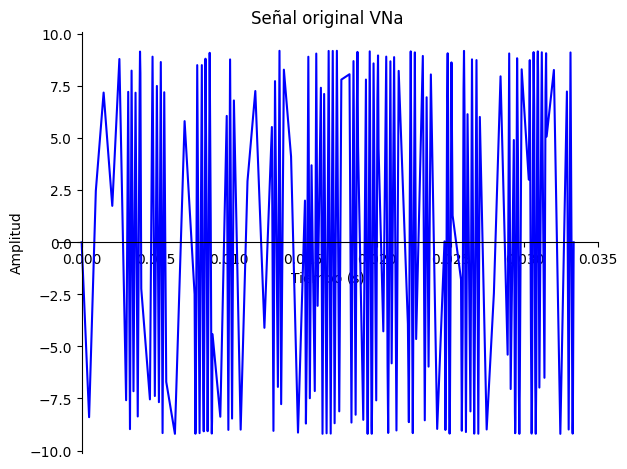

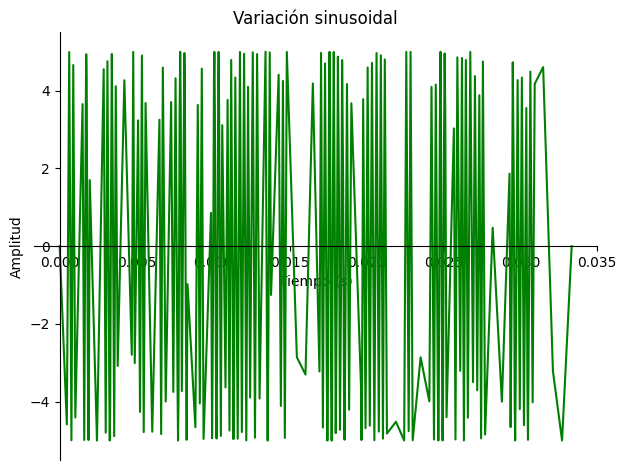

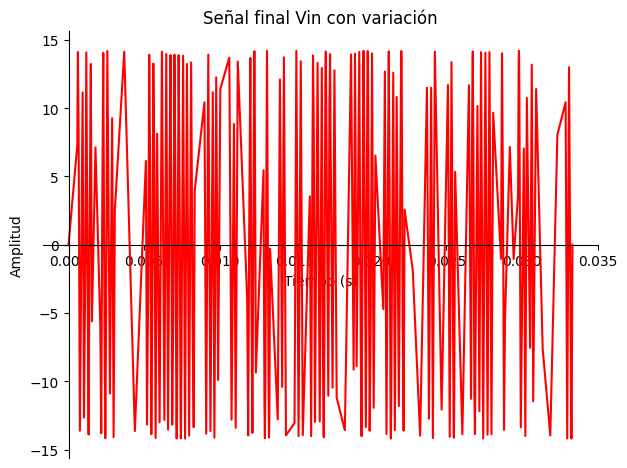

In [48]:
#SODIO Na
import sympy

# Definición de variables
tiempo = sympy.Symbol('t')
f = sympy.Symbol('f')
ENa = sympy.symbols('ENa')
VNa = sympy.symbols('VNa')
Na_out = 460
Na_in = 50
periodo_muestreo = 1/60
A = 5

# Señal original
Vin = sympy.sin(2*sympy.pi*tiempo*f/periodo_muestreo)
print("Señal original Vin:")
print(Vin)

# Consideramos a ENa como la razón de las concentraciones
ENa = Na_out/Na_in
print("Razón de concentraciones ENa:")
print(ENa)

VNa = ENa * Vin
print("Señal VNa:")
print(VNa)

# Variación sinusoidal
Vin_variacion = A * sympy.sin(2*sympy.pi*tiempo*f/periodo_muestreo)
print("Variación sinusoidal:")
print(Vin_variacion)

# Señal con la variación añadida
Vin_final = VNa + Vin_variacion
print("Señal final Vin con variación:")
print(Vin_final)

# Visualización de las señales en gráficos separados
p1 = sympy.plot(VNa.subs({Na_out: 460, Na_in: 50, f: 60}), (tiempo, 0, 2/60),
                title="Señal original VNa", ylabel="Amplitud", xlabel="Tiempo (s)", show=False)
p1[0].line_color = 'blue'
p1.show()

p2 = sympy.plot(Vin_variacion.subs({A: 5, f: 60}), (tiempo, 0, 2/60),
                title="Variación sinusoidal", ylabel="Amplitud", xlabel="Tiempo (s)", show=False)
p2[0].line_color = 'green'
p2.show()

p3 = sympy.plot(Vin_final.subs({Na_out: 460, Na_in: 50, A: 5, f: 60}), (tiempo, 0, 2/60),
                title="Señal final Vin con variación", ylabel="Amplitud", xlabel="Tiempo (s)", show=False)
p3[0].line_color = 'red'
p3.show()


Señal original Vin:
sin(120*pi*f*t)
Razón de concentraciones EK:
0.025
Señal VK:
0.025*sin(120*pi*f*t)
Variación sinusoidal:
sin(120*pi*f*t)
Señal final Vin con variación:
1.025*sin(120*pi*f*t)


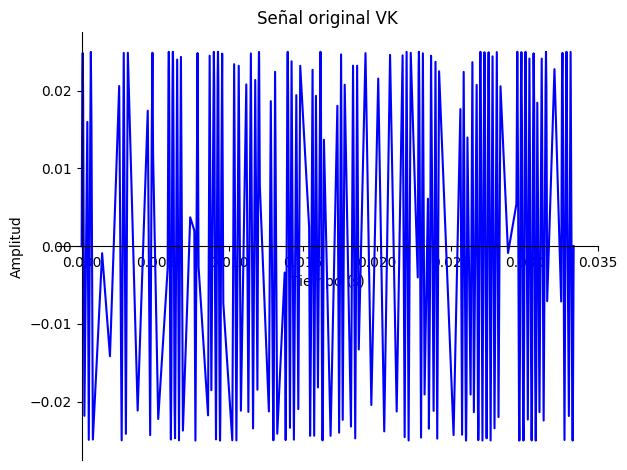

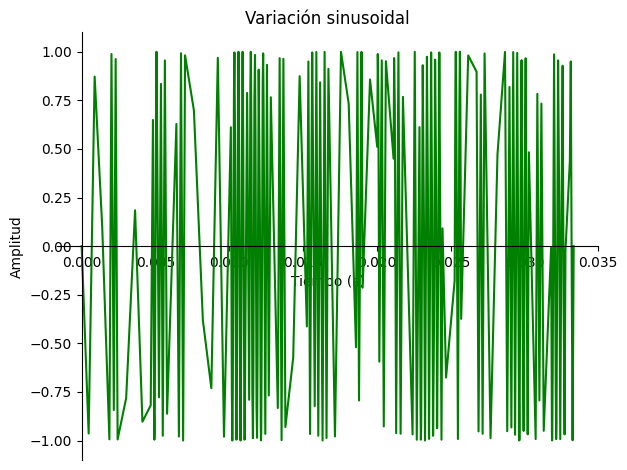

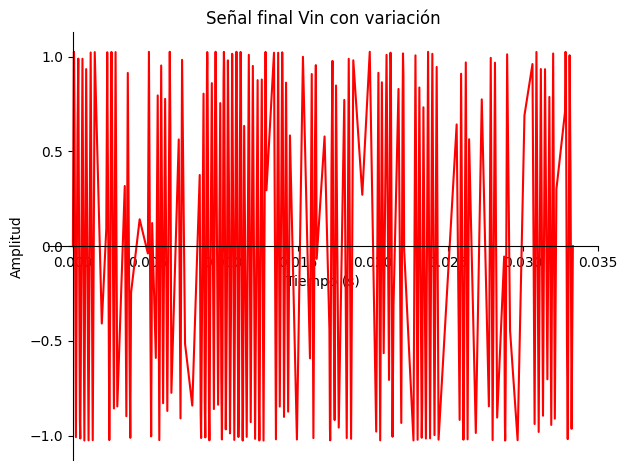

In [47]:
#POTASIO K
import sympy

# Definición de variables
tiempo = sympy.Symbol('t')
f = sympy.Symbol('f')
EK = sympy.symbols('EK')
VK = sympy.symbols('VK')
K_out = 10
K_in = 400
periodo_muestreo = 1/60
A = 1

# Señal original
Vin = sympy.sin(2*sympy.pi*tiempo*f/periodo_muestreo)
print("Señal original Vin:")
print(Vin)

# Consideramos a EK como la razón de las concentraciones
EK = K_out/K_in
print("Razón de concentraciones EK:")
print(EK)

VK = EK * Vin
print("Señal VK:")
print(VK)

# Variación sinusoidal
Vin_variacion = A * sympy.sin(2*sympy.pi*tiempo*f/periodo_muestreo)
print("Variación sinusoidal:")
print(Vin_variacion)

# Señal con la variación añadida
Vin_final = VK + Vin_variacion
print("Señal final Vin con variación:")
print(Vin_final)

# Visualización de las señales en gráficos separados
p1 = sympy.plot(VK.subs({K_out: 10, K_in: 400, f: 60}), (tiempo, 0, 2/60),
                title="Señal original VK", ylabel="Amplitud", xlabel="Tiempo (s)", show=False)
p1[0].line_color = 'blue'
p1.show()

p2 = sympy.plot(Vin_variacion.subs({A: 1, f: 60}), (tiempo, 0, 2/60),
                title="Variación sinusoidal", ylabel="Amplitud", xlabel="Tiempo (s)", show=False)
p2[0].line_color = 'green'
p2.show()

p3 = sympy.plot(Vin_final.subs({K_out: 10, K_in: 400, A: 1, f: 60}), (tiempo, 0, 2/60),
                title="Señal final Vin con variación", ylabel="Amplitud", xlabel="Tiempo (s)", show=False)
p3[0].line_color = 'red'
p3.show()
